<a href="https://colab.research.google.com/github/NedKost/MS-AAI-501-Team-Project/blob/main/data_explore_sigtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd

file_path = '/Users/anovayoungers/Downloads/flight_data.csv'

data = pd.read_csv(file_path)

print(flight_data.head())


   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2020        1      1          23          4  2020-01-23                OO   
1  2020        1      1           4          6  2020-01-04                OO   
2  2020        1      1           7          2  2020-01-07                OH   
3  2020        1      1          18          6  2020-01-18                UA   
4  2020        1      1          10          5  2020-01-10                OO   

  Tail_Number  Flight_Number_Reporting_Airline Origin  ... ArrDel15  \
0      N868CA                             3745    MOB  ...      1.0   
1      N804SK                             3905    DTW  ...      1.0   
2      N218PS                             5242    DCA  ...      1.0   
3      N57864                              502    DEN  ...      1.0   
4      N268SY                             3666    RNO  ...      1.0   

   CRSElapsedTime  ActualElapsedTime  AirTime  Flights  Distance  Carrier  \
0            86

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360000 entries, 0 to 359999
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Year                             360000 non-null  int64  
 1   Quarter                          360000 non-null  int64  
 2   Month                            360000 non-null  int64  
 3   DayofMonth                       360000 non-null  int64  
 4   DayOfWeek                        360000 non-null  int64  
 5   FlightDate                       360000 non-null  object 
 6   Reporting_Airline                360000 non-null  object 
 7   Tail_Number                      360000 non-null  object 
 8   Flight_Number_Reporting_Airline  360000 non-null  int64  
 9   Origin                           360000 non-null  object 
 10  Dest                             360000 non-null  object 
 11  DepTime                          360000 non-null  float64
 12  De

Distribution of Departure Delays

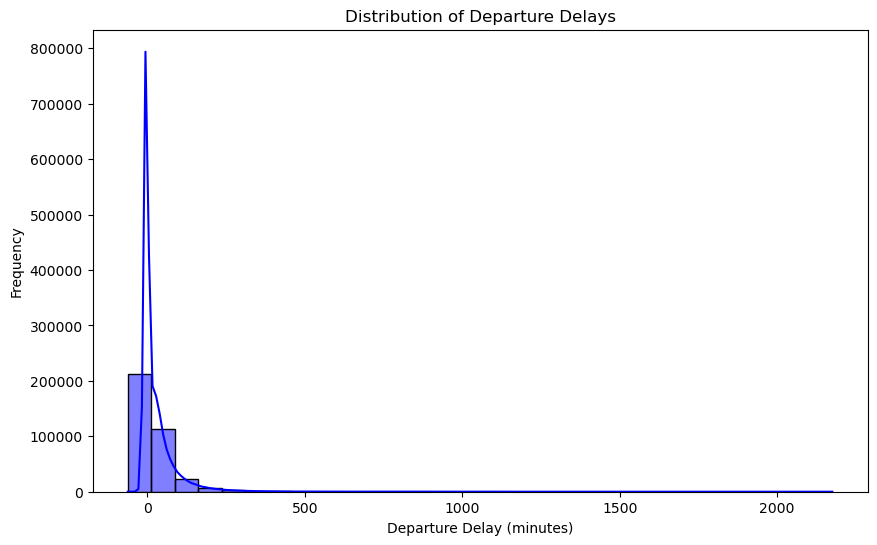

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['DepDelay'], bins=30, kde=True, color='blue')
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.show()


Flight Frequency by Airline

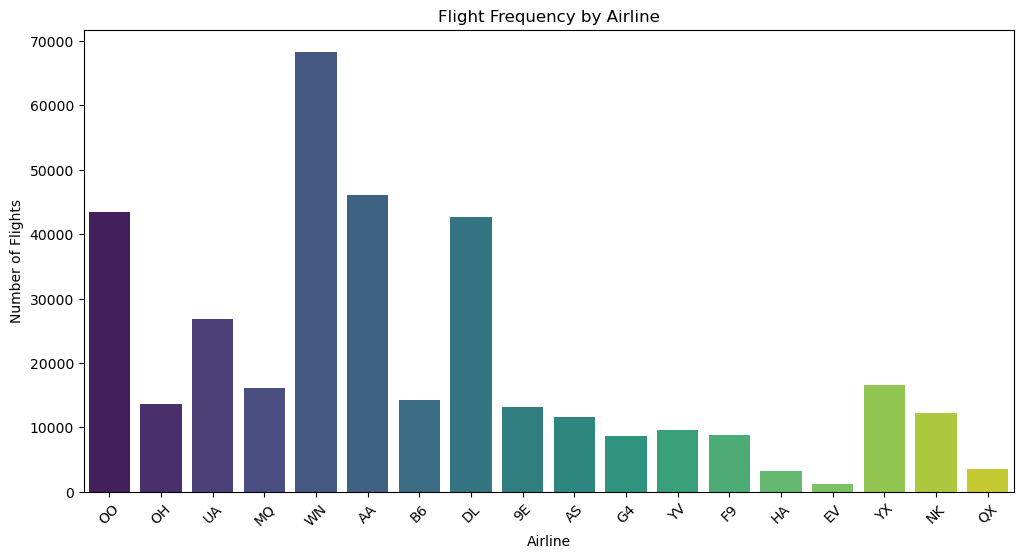

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Reporting_Airline', data=data, palette='viridis')
plt.title('Flight Frequency by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()


Airlines WN, AA, and OO are showing top three highest frequency.

Arrival Delay vs. Departure Delay

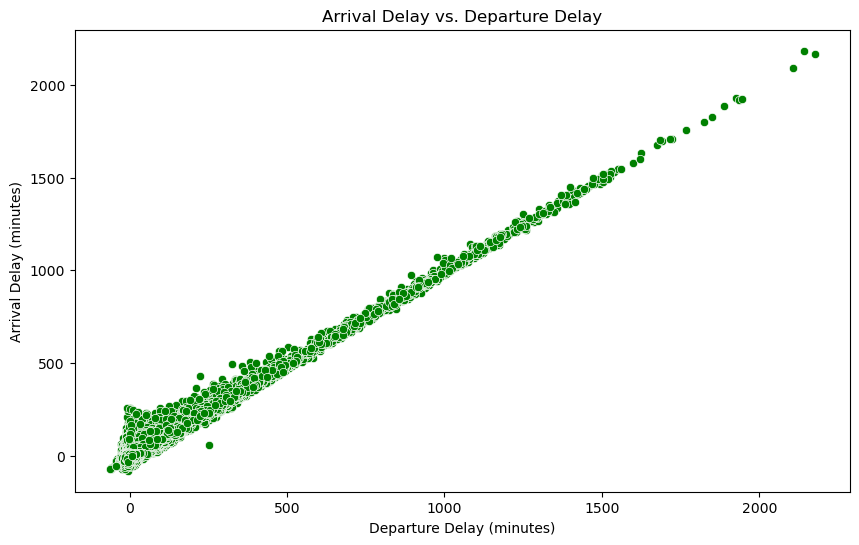

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DepDelay', y='ArrDelay', data=data, color='green')
plt.title('Arrival Delay vs. Departure Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.show()


Very few outliers here. Let me add lines for standard dev. and a trend/line of best fit.

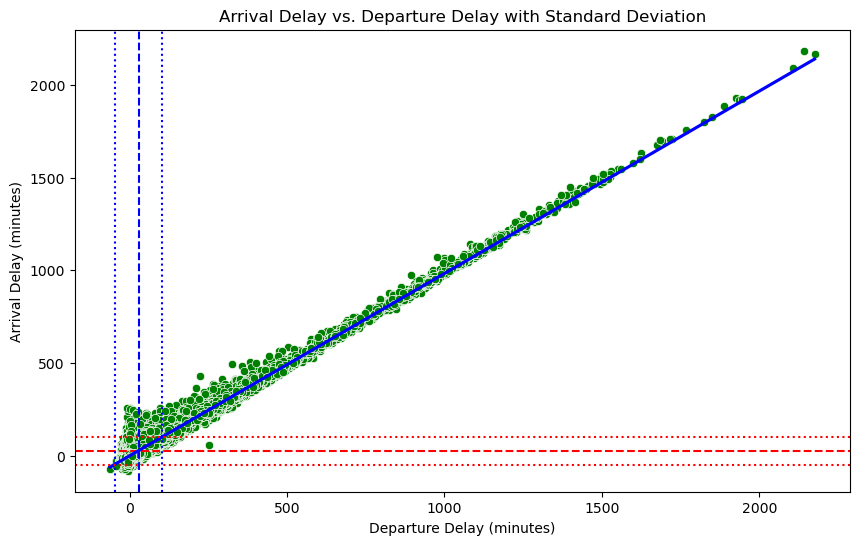

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

std_dep = data['DepDelay'].std()
std_arr = data['ArrDelay'].std()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='DepDelay', y='ArrDelay', data=data, color='green')

# Adding standard deviation lines
plt.axvline(x=data['DepDelay'].mean(), color='blue', linestyle='--')
plt.axhline(y=data['ArrDelay'].mean(), color='red', linestyle='--')

sns.regplot(x='DepDelay', y='ArrDelay', data=data, scatter=False, color='blue') #Line of best fit

plt.axvline(x=data['DepDelay'].mean() + std_dep, color='blue', linestyle=':')
plt.axvline(x=data['DepDelay'].mean() - std_dep, color='blue', linestyle=':')
plt.axhline(y=data['ArrDelay'].mean() + std_arr, color='red', linestyle=':')
plt.axhline(y=data['ArrDelay'].mean() - std_arr, color='red', linestyle=':')

plt.title('Arrival Delay vs. Departure Delay with Standard Deviation')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')

plt.show()


Average Taxi-In and Taxi-Out Time by Airline

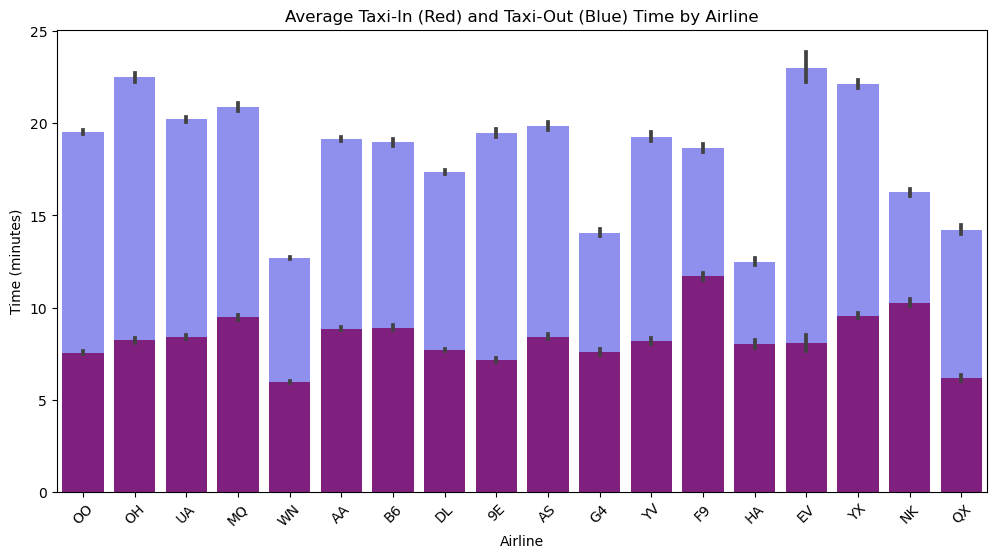

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Reporting_Airline', y='TaxiIn', data=data, color='red')
sns.barplot(x='Reporting_Airline', y='TaxiOut', data=data, color='blue', alpha=0.5)
plt.title('Average Taxi-In (Red) and Taxi-Out (Blue) Time by Airline')
plt.xlabel('Airline')
plt.ylabel('Time (minutes)')
plt.xticks(rotation=45)
plt.show()


WN is our highest frequency airline and yet has notably shorter Taxi-in and Taxi-out times.

Flights Over Time (Time Series)

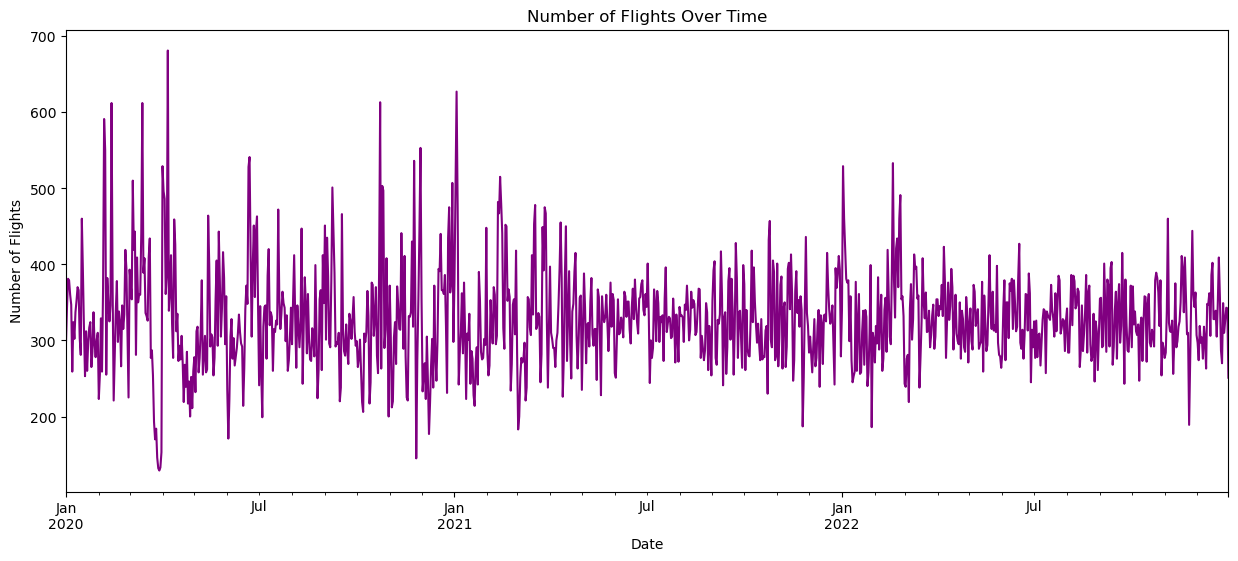

In [ ]:
data['FlightDate'] = pd.to_datetime(data['FlightDate'])
flights_over_time = data.groupby('FlightDate').size()
plt.figure(figsize=(15, 6))
flights_over_time.plot(kind='line', color='purple')
plt.title('Number of Flights Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.show()


The amount of flights being taken is lessening as time goes on.

Boxplot of Delays by Day of the Week

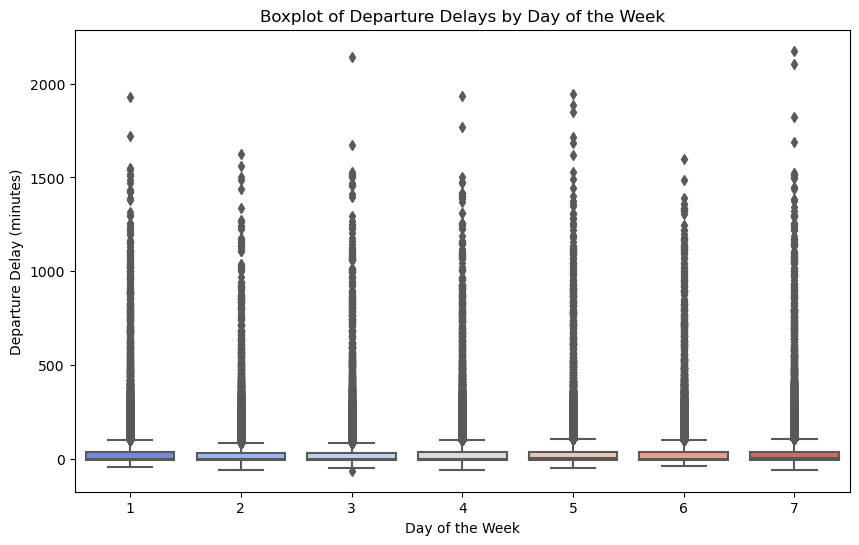

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='DepDelay', data=data, palette='coolwarm')
plt.title('Boxplot of Departure Delays by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Departure Delay (minutes)')
plt.show()


Correlation Heatmap of Numerical Features

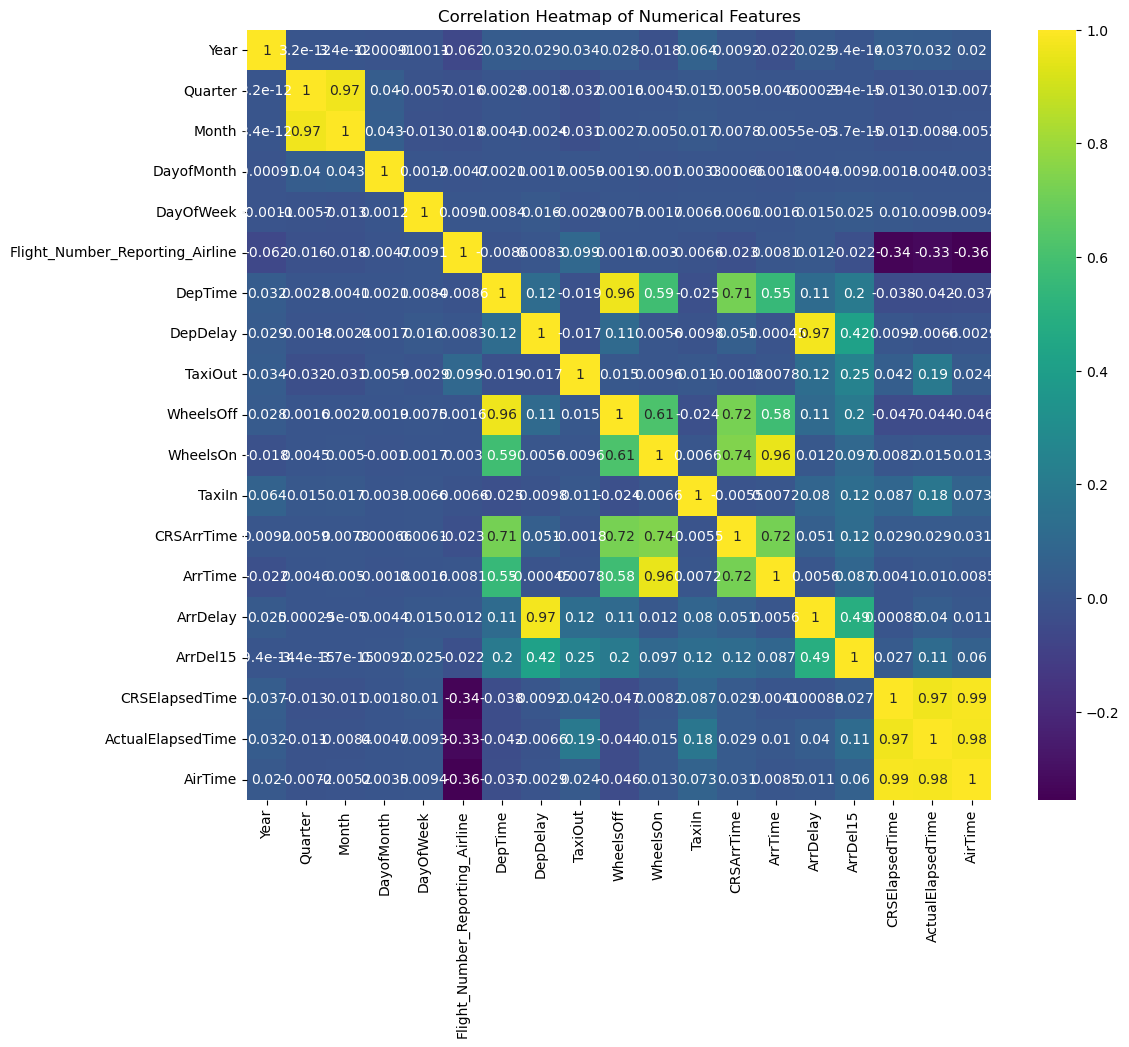

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_data = data.select_dtypes(include=['float64', 'int64'])
numerical_data = numerical_data.drop(columns=['Flights', 'Distance', 'Full-time', 'Part-time', 'Grand Total'])

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



 Flight Distance Distribution

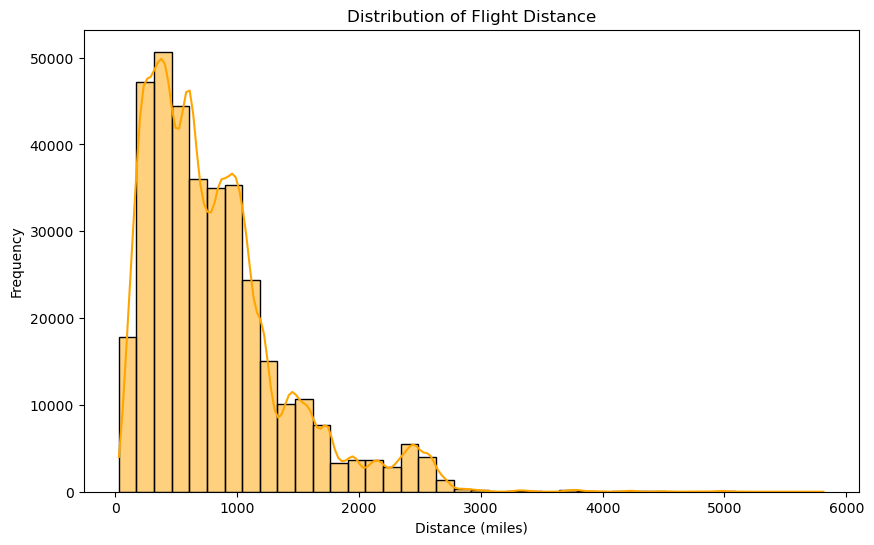

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Distance'], bins=40, kde=True, color='orange')
plt.title('Distribution of Flight Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()


significantly less flights are taken as the distance in miles rises.

Arrival Delay Distribution by Quarter

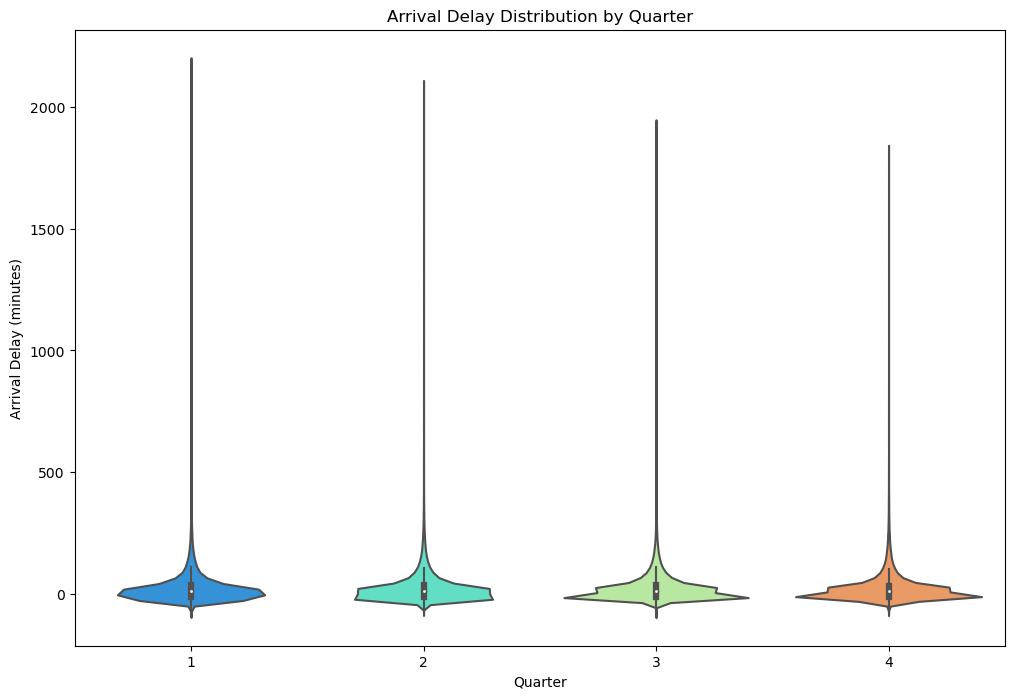

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Quarter', y='ArrDelay', data=data, palette='rainbow')
plt.title('Arrival Delay Distribution by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Arrival Delay (minutes)')
plt.show()


As we get later in the year the Arrival Delays by min. lessen.

Top 10 Flight Routes

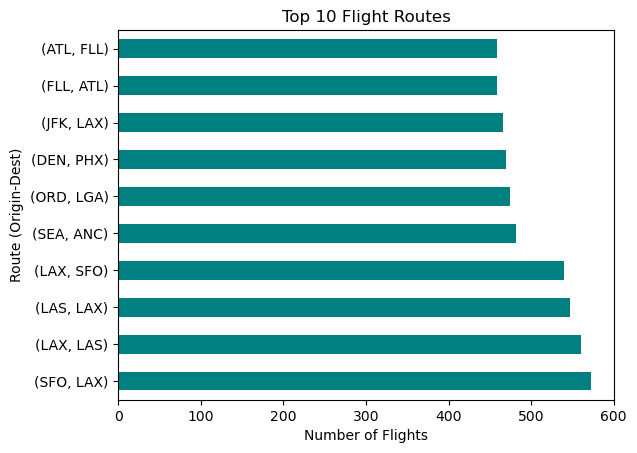

In [ ]:
top_routes = data.groupby(['Origin', 'Dest']).size().sort_values(ascending=False).head(10)
top_routes.plot(kind='barh', color='teal')
plt.title('Top 10 Flight Routes')
plt.xlabel('Number of Flights')
plt.ylabel('Route (Origin-Dest)')
plt.show()


3D Plot of Delays by Time of Day, Day of Week, and Airline

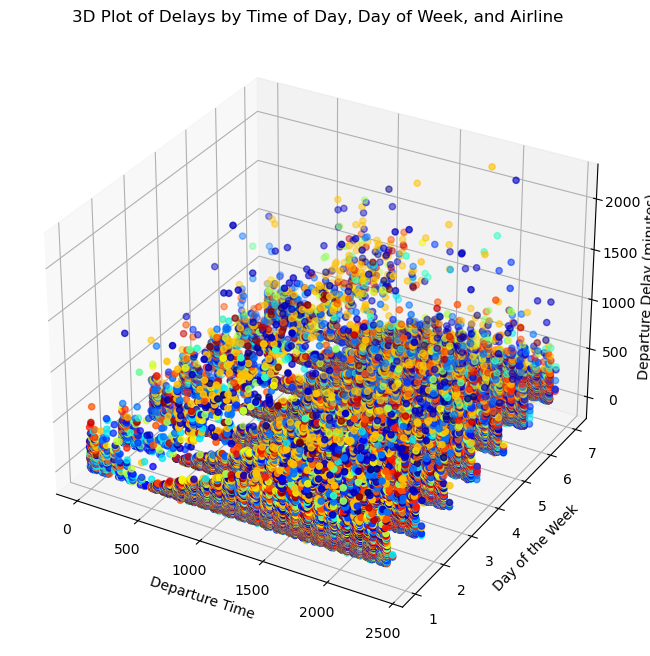

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = data['DepTime']
y = data['DayOfWeek']
z = data['DepDelay']
colors = data['Reporting_Airline'].astype('category').cat.codes

ax.scatter(x, y, z, c=colors, cmap='jet')
ax.set_xlabel('Departure Time')
ax.set_ylabel('Day of the Week')
ax.set_zlabel('Departure Delay (minutes)')
ax.set_title('3D Plot of Delays by Time of Day, Day of Week, and Airline')
plt.show()


Way too convoluted, let me try sampling the data to heighten readability.

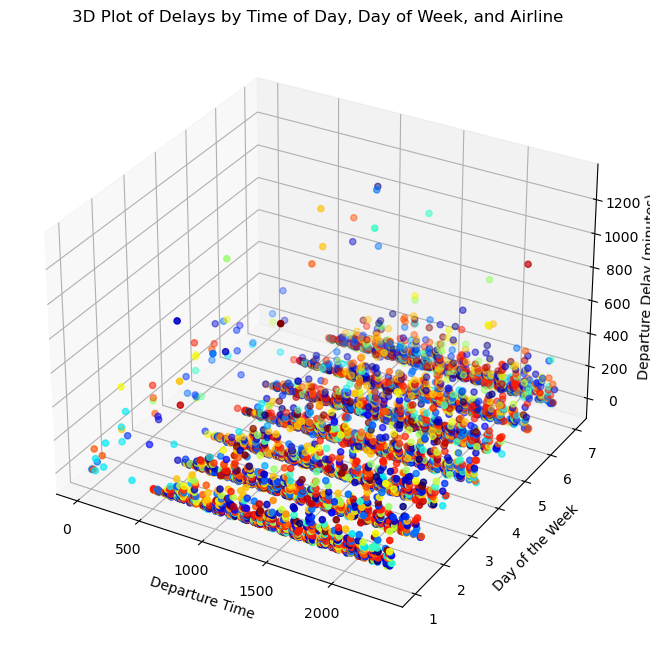

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

sampled_data = data.sample(frac=0.02)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = sampled_data['DepTime']
y = sampled_data['DayOfWeek']
z = sampled_data['DepDelay']
colors = sampled_data['Reporting_Airline'].astype('category').cat.codes

ax.scatter(x, y, z, c=colors, cmap='jet')
ax.set_xlabel('Departure Time')
ax.set_ylabel('Day of the Week')
ax.set_zlabel('Departure Delay (minutes)')
ax.set_title('3D Plot of Delays by Time of Day, Day of Week, and Airline')
plt.show()



Average Delay by Distance

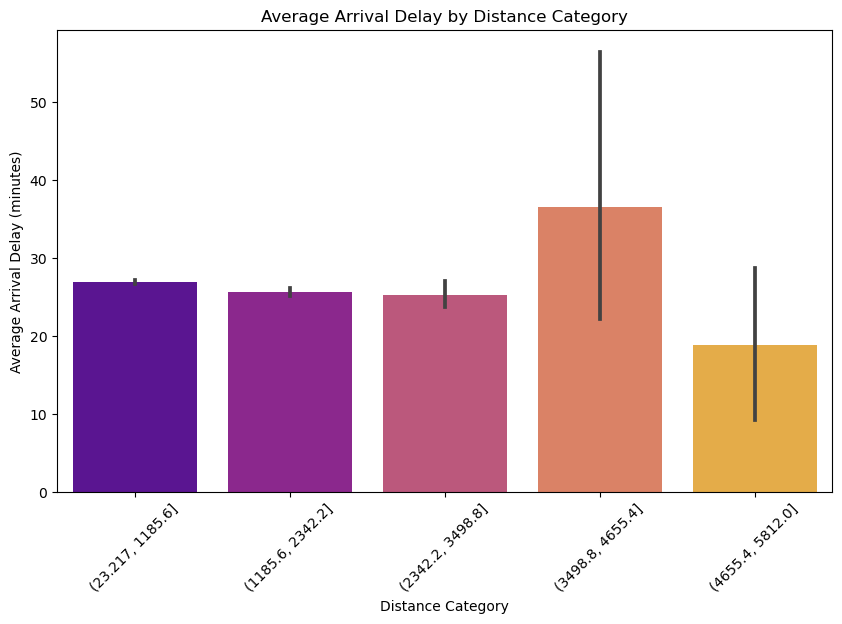

In [ ]:
data['DistanceCategory'] = pd.cut(data['Distance'], bins=5)

plt.figure(figsize=(10, 6))
sns.barplot(x='DistanceCategory', y='ArrDelay', data=data, palette='plasma')
plt.title('Average Arrival Delay by Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()


Arrival delay  by minutes notably dips at the longest flight distance.

SIGNIFICANCE TESTING

T-Test for Departure Delays on Weekends vs. Weekdays

In [ ]:
from scipy.stats import ttest_ind

# Departure Delays on Weekends (6, 7) vs Weekdays (1-5)
weekend_delays = data[data['DayOfWeek'] >= 6]['DepDelay']
weekday_delays = data[data['DayOfWeek'] < 6]['DepDelay']

t_stat, p_val = ttest_ind(weekend_delays, weekday_delays, nan_policy='omit')
print("T-Test for Departure Delays on Weekends vs. Weekdays:", t_stat, p_val)


T-Test for Departure Delays on Weekends vs. Weekdays: 8.184646707726491 2.7398126621782807e-16


A value of approximately 8.18 is quite high, suggesting a significant difference in departure delays between weekends and weekdays. The p-value is extremely small (2.74e-16, practically zero), which is far below the common threshold of 0.05. This strongly suggests that the observed difference in departure delays between weekends and weekdays is statistically significant and not due to random chance.

Chi-Square Test for Independence between Airline and Delay > 15 Minutes

In [ ]:
from scipy.stats import chi2_contingency

# Crosstab between Airline and Delays over 15 minutes
contingency_table = pd.crosstab(data['Reporting_Airline'], data['ArrDel15'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test for Airline and Delay > 15 Minutes:", chi2, p)


Chi-Square Test for Airline and Delay > 15 Minutes: 4058.360041635817 0.0


The very high Chi-Square statistic suggests a strong association between the airline and the occurrence of delays greater than 15 minutes. This means that the frequency of delays over 15 minutes is not the same across all airlines; some airlines may have more frequent delays than others. Based on these results, you can conclude that there is a significant relationship between the specific airline and the likelihood of a flight being delayed by more than 15 minutes.

ANOVA Test for Arrival Delays across Different Airlines

In [ ]:
from scipy.stats import f_oneway

groups = data.groupby('Reporting_Airline')['ArrDelay'].apply(list)

f_stat, p_val = f_oneway(*groups)
print("ANOVA Test for Arrival Delays across Different Airlines:", f_stat, p_val)


ANOVA Test for Arrival Delays across Different Airlines: 158.7837822670901 0.0


The high F-statistic indicates that there are significant differences in the means of arrival delays among different airlines. This suggests that the average arrival delay is not consistent across all airlines; some airlines may have longer or shorter delays on average compared to others.

 Pearson Correlation Coefficient between Distance and AirTime

In [ ]:
from scipy.stats import pearsonr

corr, p_val = pearsonr(data['Distance'], data['AirTime'].dropna())
print("Pearson Correlation between Distance and AirTime:", corr, p_val)


Pearson Correlation between Distance and AirTime: 0.979828225543139 0.0


The very high correlation coefficient (0.9798) implies that there is a very strong positive linear association between the Distance of flights and their AirTime. This result is intuitive, as longer distances are typically associated with longer air times.

Spearman Rank Correlation between Departure Delay and Arrival Delay

In [ ]:
from scipy.stats import spearmanr

corr, p_val = spearmanr(data['DepDelay'], data['ArrDelay'].dropna())
print("Spearman Rank Correlation between Departure Delay and Arrival Delay:", corr, p_val)


Spearman Rank Correlation between Departure Delay and Arrival Delay: 0.8156624494420213 0.0


The Spearman rank correlation coefficient measures the strength and direction of the monotonic relationship between two ranked variables. Unlike Pearson's correlation, which assesses linear relationships, Spearman's correlation is based on the ranked values of the data and can capture non-linear relationships as well. The coefficient ranges from -1 to +1, with +1 indicating a perfect positive monotonic relationship, -1 a perfect negative monotonic relationship, and 0 no relationship. A value of approximately 0.816 suggests a strong positive monotonic relationship between Departure Delay and Arrival Delay. This means that as the Departure Delay increases, the Arrival Delay tends to increase as well, and vice versa.

Mann-Whitney U Test for Taxi-In Times between Two Airlines

In [ ]:
from scipy.stats import mannwhitneyu

airline1_taxi_in = data[data['Reporting_Airline'] == 'AA']['TaxiIn']
airline2_taxi_in = data[data['Reporting_Airline'] == 'UA']['TaxiIn']

u_stat, p_val = mannwhitneyu(airline1_taxi_in, airline2_taxi_in, alternative='two-sided')
print("Mann-Whitney U Test for Taxi-In Times between Two Airlines:", u_stat, p_val)


Mann-Whitney U Test for Taxi-In Times between Two Airlines: 679110961.5 2.904795559687451e-113


The U statistic, in this case, 679110961.5, represents the number of times a Taxi-In time from one airline is greater than a Taxi-In time from the other airline, across all possible pairwise comparisons. The p-value  tells us the probability of observing a U statistic as extreme as, or more extreme than, the one calculated if there were actually no difference between the two groups (null hypothesis). The extremely small p-value in this case (practically zero) suggests that the probability of observing such a difference in Taxi-In times between the two airlines due to random chance is incredibly low.

Kruskal-Wallis Test for Arrival Delay by Day of the Week

In [ ]:
from scipy.stats import kruskal

groups = data.groupby('DayOfWeek')['ArrDelay'].apply(list)

k_stat, p_val = kruskal(*groups)
print("Kruskal-Wallis Test for Arrival Delay by Day of the Week:", k_stat, p_val)


Kruskal-Wallis Test for Arrival Delay by Day of the Week: 1243.139328793806 2.2032900300990522e-265


The high Kruskal-Wallis H statistic and the very low p-value indicate that there are statistically significant differences in Arrival Delays across the different days of the week. This means that the day of the week is likely a significant factor influencing Arrival Delays.

 Linear Regression Analysis for Distance vs. AirTime

In [ ]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(data['Distance'], data['AirTime'].dropna())
print("Linear Regression Analysis for Distance vs. AirTime:", slope, intercept, r_value, p_value)


Linear Regression Analysis for Distance vs. AirTime: 0.11779283494004683 18.105489421166794 0.9798282255434976 0.0


he slope of 0.1178 suggests a positive linear relationship between Distance and AirTime. Each unit increase in Distance is associated with an increase in AirTime by about 0.1178 units.
The high correlation coefficient confirms this strong positive linear relationship.
The p-value being effectively zero reinforces the statistical significance of this relationship.
While the intercept's value might not be practically significant in this context, it is a standard part of the linear regression output.

Logistic Regression for Predicting Delay > 15 Minutes Based on Departure Time

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X = data['DepTime'].values.reshape(-1, 1)
y = (data['ArrDel15'] == 1).astype(int)

log_reg = LogisticRegression()
log_reg.fit(X, y)

print("Logistic Regression Coefficients:", log_reg.coef_, log_reg.intercept_)


Logistic Regression Coefficients: [[0.0008291]] [-1.14899314]


The positive coefficient for Departure Time indicates that as Departure Time increases, the likelihood (or odds) of the flight being delayed more than 15 minutes also increases. The intercept of -1.14899314 suggests that when the Departure Time is zero (which may not be a practical scenario in this context), the log odds of the delay being more than 15 minutes is -1.14899314.

Time Series Analysis for Flight Counts Over Months

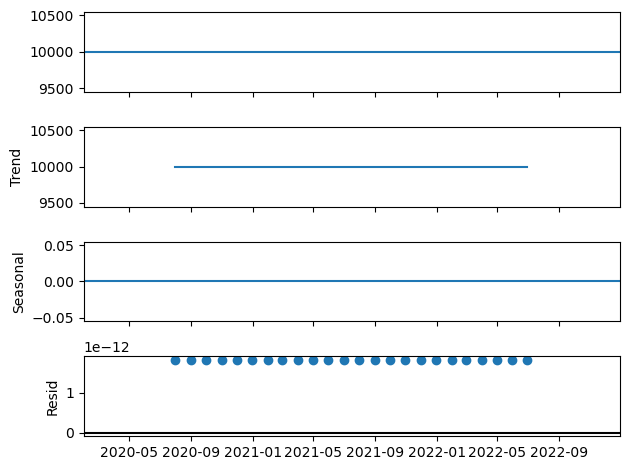

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

data.set_index('FlightDate', inplace=True)
monthly_counts = data.resample('M').size()
result = seasonal_decompose(monthly_counts, model='additive')

result.plot()
plt.show()


Proportion Z-Test for On-Time Arrival between Two Airlines

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

airline1_data = data[data['Reporting_Airline'] == 'AA']
airline2_data = data[data['Reporting_Airline'] == 'DL']

count = np.array([airline1_data['ArrDel15'].sum(), airline2_data['ArrDel15'].sum()])
nobs = np.array([len(airline1_data), len(airline2_data)])

stat, p_val = proportions_ztest(count, nobs)
print("Proportion Z-Test for On-Time Arrival between Two Airlines:", stat, p_val)


Proportion Z-Test for On-Time Arrival between Two Airlines: 25.95832886504291 1.4643516491342103e-148


Given these results, I can confidently assert that there is a statistically significant difference in on-time arrival rates between the two airlines analyzed. The data strongly suggests that one airline has a higher on-time arrival rate than the other.

Box-Cox Transformation for Normalizing Departure Delays

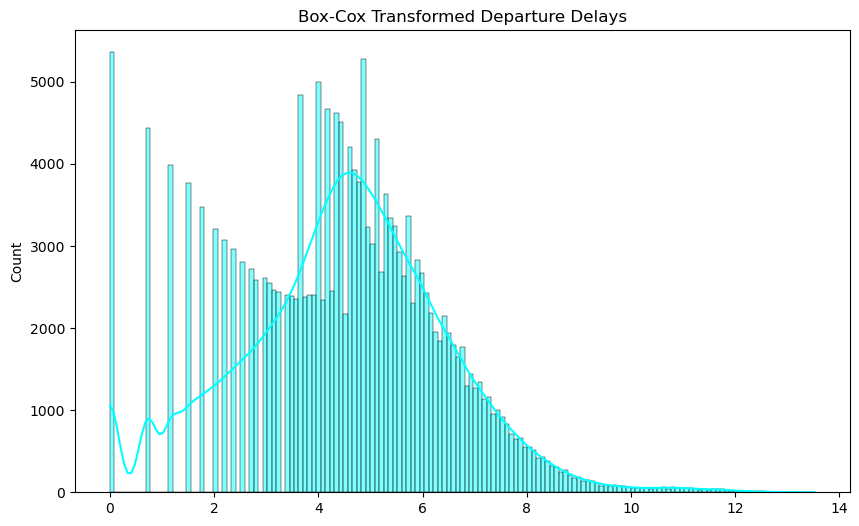

In [ ]:
from scipy.stats import boxcox

transformed_data, _ = boxcox(data[data['DepDelay'] > 0]['DepDelay'])
plt.figure(figsize=(10, 6))
sns.histplot(transformed_data, kde=True, color='cyan')
plt.title('Box-Cox Transformed Departure Delays')
plt.show()
